In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

from networkx.readwrite import json_graph
import json

import pandas

import copy
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# MHO
adjmat_MHO  = pd.read_csv("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/mho_edges.csv")
adjmat_MHO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MHNO
adjmat_MHNO  = pd.read_csv("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/mhno_edges.csv")
adjmat_MHNO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MUO
adjmat_MUO  = pd.read_csv("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/muo_edges.csv")
adjmat_MUO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

# MUNO
adjmat_MUNO  = pd.read_csv("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/networkFiles/muno_edges.csv")
adjmat_MUNO.rename(columns=lambda x: x.replace('.', '|'), inplace=True)

In [4]:
def create_net(adjmat):
  # Create an empty graph
  tmpG= nx.Graph()

  # Iterate over the rows and columns of the DataFrame to add edges with weights
  for row in range(len(adjmat)):
    # print(adjmat.iloc[row, 0])
    source = adjmat.iloc[row, 0]
    target = adjmat.iloc[row, 1]
    weight = adjmat.iloc[row, 2]

    # Skip diagonal and negative edges
    if source != target and weight > 0:
        tmpG.add_edge(source, target, weight=weight)
  return(tmpG)

In [5]:
MHO = create_net(adjmat_MHO)
MHNO = create_net(adjmat_MHNO)
MUO = create_net(adjmat_MUO)
MUNO = create_net(adjmat_MUNO)

In [6]:
def get_connected_graph(net):
  # Get a list of connected components
  components = list(nx.connected_components(net))
  # Find the largest connected component
  largest_component = max(components, key=len)
  # Create a new graph containing only the largest component
  net_largest = net.subgraph(largest_component)
  print('Connected graph:', nx.is_connected(net_largest))
  return(net_largest)


MHO = get_connected_graph(MHO)
MHNO = get_connected_graph(MHNO)
MUO = get_connected_graph(MUO)
MUNO = get_connected_graph(MUNO)

Connected graph: True
Connected graph: True
Connected graph: True
Connected graph: True


# Ataques a la red

## Ataque aleatorio
La función que utilizamos hace lo siguiente:
1. Selecciona un nodo aleatorio dentro de la lista de nodos
2. Elimina el nodo del grafo
3. Obtiene el tamaño del mayor componente conexo

Después visualizamos el tamaño de la mayor componente conexa en función del número de nodos eliminados.

In [7]:
def remove_random_node(g, n):
  lcc_sizes = []
  for i in range(n):
    node = random.choice(list(g.nodes()))
    g.remove_node(node)
    try:
      lcc_size = len(max(nx.connected_components(g), key=len))
    except:
      lcc_size = 0
    lcc_sizes.append(lcc_size)
  return(lcc_sizes)

In [8]:
mho_col = "#2a9d8f"
mhno_col = "#264653"
muo_col = "#edafb8"
muno_col = "#703d67"

In [9]:
nreps = 1000

In [10]:
MHO_lcc_sizes_random = [] # 3 min (10k), 28 s (1k)

while len(MHO_lcc_sizes_random) < nreps:
  # print(len(MHO_lcc_sizes_random))
  MHO_kk = nx.Graph(MHO) # copia para no cargarnos el original
  MHO_lcc_sizes_random.append(remove_random_node(MHO_kk, MHO_kk.order()))

In [11]:
MHNO_lcc_sizes_random = []

while len(MHNO_lcc_sizes_random) < nreps:
  # print(len(MHNO_lcc_sizes_random))
  MHNO_kk = nx.Graph(MHNO) # copia para no cargarnos el original
  MHNO_lcc_sizes_random.append(remove_random_node(MHNO_kk, MHNO_kk.order()))

In [12]:
MUO_lcc_sizes_random = []

while len(MUO_lcc_sizes_random) < nreps:
  # print(len(MUO_lcc_sizes_random))
  MUO_kk = nx.Graph(MUO) # copia para no cargarnos el original
  MUO_lcc_sizes_random.append(remove_random_node(MUO_kk, MUO_kk.order()))

In [13]:
MUNO_lcc_sizes_random = [] #

while len(MUNO_lcc_sizes_random) < nreps:
  # print(len(MUNO_lcc_sizes_random))
  MUNO_kk = nx.Graph(MUNO) # copia para no cargarnos el original
  MUNO_lcc_sizes_random.append(remove_random_node(MUNO_kk, MUNO_kk.order()))

In [14]:
arr_MHO = np.array(MHO_lcc_sizes_random)
arr_MHNO = np.array(MHNO_lcc_sizes_random)
arr_MUO = np.array(MUO_lcc_sizes_random)
arr_MUNO = np.array(MUNO_lcc_sizes_random)

In [15]:
plot_MHO = np.mean(arr_MHO, axis = 0)
plot_MHNO = np.mean(arr_MHNO, axis = 0)
plot_MUO = np.mean(arr_MUO, axis = 0)
plot_MUNO = np.mean(arr_MUNO, axis = 0)

In [16]:
sd_MHO = np.std(arr_MHO, axis = 0)
sd_MHNO = np.std(arr_MHNO, axis = 0)
sd_MUO = np.std(arr_MUO, axis = 0)
sd_MUNO = np.std(arr_MUNO, axis = 0)

In [17]:
x_vals_MHO = [100 * i/MHO.order() for i in range(MHO.order())]
x_vals_MHNO = [100 * i/MHNO.order() for i in range(MHNO.order())]
x_vals_MUO = [100 * i/MUO.order() for i in range(MUO.order())]
x_vals_MUNO = [100 * i/MUNO.order() for i in range(MUNO.order())]

In [18]:
MHO_rand_to_plot = np.array([100 * i/MHO.order() for i in plot_MHO])
MHNO_rand_to_plot = np.array([100 * i/MHNO.order() for i in plot_MHNO])
MUO_rand_to_plot = np.array([100 * i/MUO.order() for i in plot_MUO])
MUNO_rand_to_plot = np.array([100 * i/MUNO.order() for i in plot_MUNO])



MHO_rand_to_plot_sd = np.array([100 * i/MHO.order() for i in sd_MHO])
MHNO_rand_to_plot_sd = np.array([100 * i/MHNO.order() for i in sd_MHNO])
MUO_rand_to_plot_sd =  np.array([100 * i/MUO.order() for i in sd_MUO])
MUNO_rand_to_plot_sd =  np.array([100 * i/MUNO.order() for i in sd_MUNO])


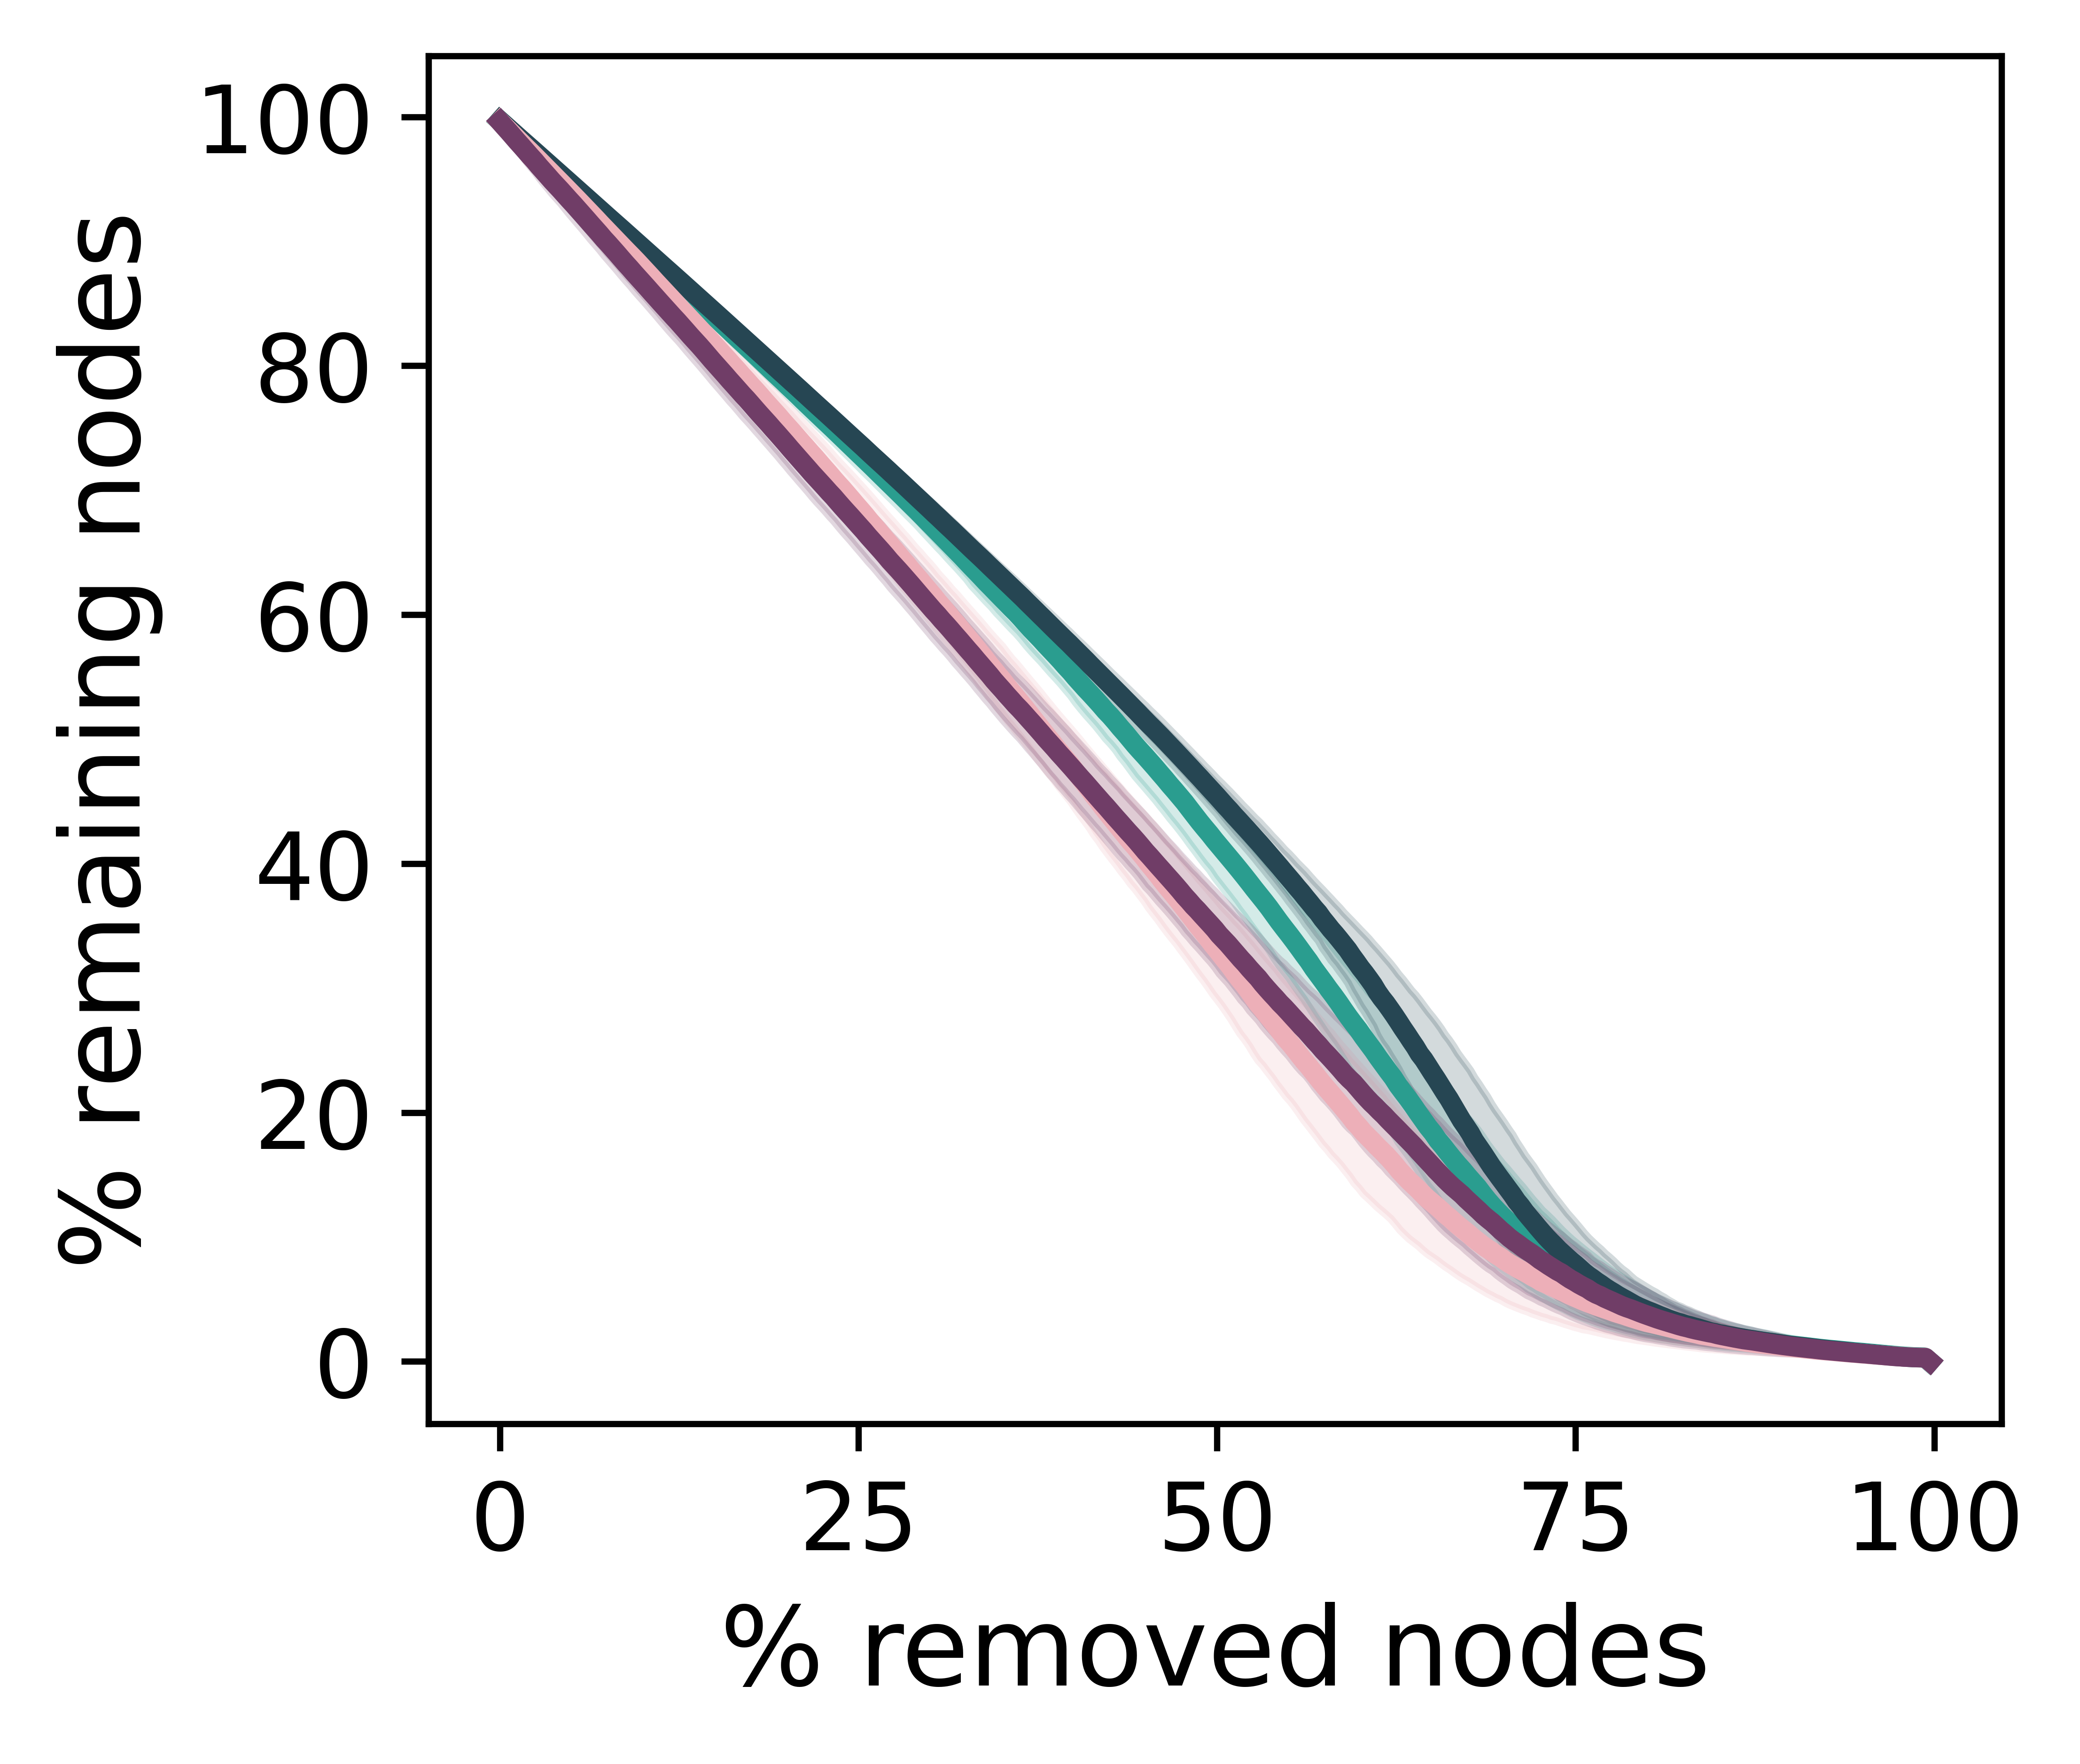

In [19]:
# Tamaño y resolución de la figura
plt.figure(figsize=(3.6, 3.15), dpi=1200)  # Cambia figsize y dpi según prefieras

# Graficar con mayor grosor de línea
plt.plot(x_vals_MHO, MHO_rand_to_plot,linewidth = 2.5,
         label ="MHO", color = mho_col)
plt.fill_between(x_vals_MHO,
                 MHO_rand_to_plot - MHO_rand_to_plot_sd,
                 MHO_rand_to_plot + MHO_rand_to_plot_sd,
                  edgecolor = "none",
                 color=mho_col, alpha=0.2)

plt.plot(x_vals_MHNO, MHNO_rand_to_plot,linewidth = 2.5,
         label ="MHNO", color = mhno_col)
plt.fill_between(x_vals_MHNO,
                 MHNO_rand_to_plot - MHNO_rand_to_plot_sd,
                 MHNO_rand_to_plot + MHNO_rand_to_plot_sd,
                  edgecolor = "none",
                 color=mhno_col, alpha=0.2)

plt.plot(x_vals_MUO, MUO_rand_to_plot,linewidth = 2.5,
         label ="MUO", color = muo_col)
plt.fill_between(x_vals_MUO,
                 MUO_rand_to_plot - MUO_rand_to_plot_sd,
                 MUO_rand_to_plot + MUO_rand_to_plot_sd,
                  edgecolor = "none",
                 color=muo_col, alpha=0.2)

plt.plot(x_vals_MUNO, MUNO_rand_to_plot,linewidth = 2.5,
         label ="MUNO", color = muno_col)
plt.fill_between(x_vals_MUNO,
                 MUNO_rand_to_plot - MUNO_rand_to_plot_sd,
                 MUNO_rand_to_plot + MUNO_rand_to_plot_sd,
                  edgecolor = "none",
                 color=muno_col, alpha=0.2)
# Ajustar etiquetas y leyenda
plt.xlabel("% removed nodes", fontsize = 14)
plt.ylabel("% remaining nodes", fontsize = 14)

# Ajustar tamaño de los números en los ejes
plt.tick_params(axis='both', which='major', labelsize=12)

# Guardar figura
plt.savefig("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/randomPoster.png",
            format='png', dpi=1200,
            bbox_inches='tight')  # Cambia 'mi_grafico.png' al nombre deseado
plt.show();

# Nodos a eliminar para desmontar 50% de la red

In [20]:
nreps = 1000

In [21]:
threshold = .5 # proporcion de nodos que quedan

In [22]:
def remove_random_node(g, n):
  number_of_attacks = 0
  gOrder = g.order()
  lcc_size = g.order()
  for i in range(n):
    number_of_attacks += 1
    node = random.choice(list(g.nodes()))
    g.remove_node(node)
    try:
      lcc_size = len(max(nx.connected_components(g), key=len))
    except:
      lcc_size = 0
    if lcc_size/gOrder <= threshold:
      break

  return(number_of_attacks/gOrder)

In [23]:
MHO_thresholds = []

while len(MHO_thresholds) < nreps:
  MHO_kk = nx.Graph(MHO)
  a50 = remove_random_node(MHO_kk, MHO_kk.order())
  MHO_thresholds.append(a50)

In [24]:
MHNO_thresholds = []

while len(MHNO_thresholds) < nreps:
  MHNO_kk = nx.Graph(MHNO)
  a50 = remove_random_node(MHNO_kk, MHNO_kk.order())
  MHNO_thresholds.append(a50)

In [25]:
MUO_thresholds = []

while len(MUO_thresholds) < nreps:
  MUO_kk = nx.Graph(MUO)
  a50 = remove_random_node(MUO_kk, MUO_kk.order())
  MUO_thresholds.append(a50)

In [26]:
MUNO_thresholds = []

while len(MUNO_thresholds) < nreps:
  MUNO_kk = nx.Graph(MUNO)
  a50 = remove_random_node(MUNO_kk, MUNO_kk.order())
  MUNO_thresholds.append(a50)

In [27]:
import seaborn as sns
sns.set(style="whitegrid")
my_pal = {"MHO" : mho_col, "MHNO" : mhno_col,
          "MUO" : muo_col, "MUNO" : muno_col}

In [28]:
a50_dict = {'MHO': MHO_thresholds,
            'MHNO': MHNO_thresholds,
            'MUO': MUO_thresholds,
            'MUNO': MUNO_thresholds
            }

df = pd.DataFrame(data = a50_dict)

In [29]:
df.head()

,MHO,MHNO,MUO,MUNO
0,0.463668,0.447059,0.359873,0.398792
1,0.429066,0.473529,0.385350,0.347432
2,0.397924,0.450000,0.382166,0.377644
3,0.449827,0.464706,0.410828,0.368580
4,0.425606,0.467647,0.353503,0.395770


In [30]:
df.mean(axis = 0)

,0
MHO,0.446083
MHNO,0.466288
MUO,0.388850
MUNO,0.384743


In [31]:
df.std(axis = 0)

,0
MHO,0.017141
MHNO,0.010377
MUO,0.020078
MUNO,0.019254


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 16.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


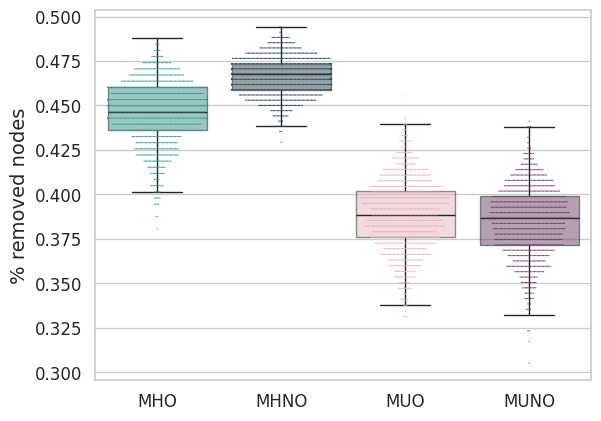

In [32]:

# # Tamaño y resolución de la figura
# plt.figure(figsize=(3.6, 3.15), dpi=1200)  # Cambia figsize y dpi según prefieras
ax = sns.boxplot(data = df, showfliers = False, boxprops=dict(alpha=.5),
                 palette = my_pal)
ax = sns.swarmplot(data = df, size = .9, palette = my_pal)

# Ajustar etiquetas y leyenda
plt.ylabel("% removed nodes", fontsize = 14)
# Ajustar tamaño de los números en los ejes
plt.tick_params(axis='both', which='major', labelsize=12)


plt.show()

In [33]:
from scipy import stats

(array([  3.,  13.,  29.,  88., 146., 305., 215., 130.,  53.,  18.]),
 array([0.42941176, 0.43588235, 0.44235294, 0.44882353, 0.45529412,
        0.46176471, 0.46823529, 0.47470588, 0.48117647, 0.48764706,
        0.49411765]),
 <BarContainer object of 10 artists>)

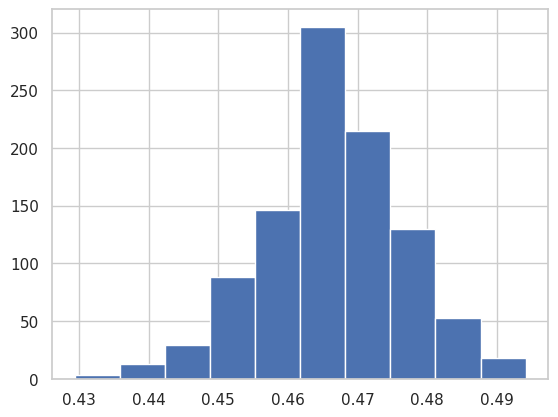

In [34]:
plt.hist(df[["MHNO"]]) # non-normal

In [35]:
resK = stats.kruskal(df[["MHNO"]], df[["MHO"]], df[["MUNO"]], df[["MUO"]])
resK

KruskalResult(statistic=array([3114.28748701]), pvalue=array([0.]))

In [36]:
print(stats.wilcoxon(df[["MHO"]], df[["MHNO"]]))
print(stats.wilcoxon(df[["MHO"]], df[["MUO"]]))
print(stats.wilcoxon(df[["MHO"]], df[["MUNO"]]))
print(stats.wilcoxon(df[["MHNO"]], df[["MUNO"]]))
print(stats.wilcoxon(df[["MHNO"]], df[["MUO"]]))
print(stats.wilcoxon(df[["MUNO"]], df[["MUO"]]))

WilcoxonResult(statistic=array([34826.]), pvalue=array([3.78511343e-122]))
WilcoxonResult(statistic=array([930.]), pvalue=array([5.39104563e-164]))
WilcoxonResult(statistic=array([189.]), pvalue=array([5.85517027e-165]))
WilcoxonResult(statistic=array([0.]), pvalue=array([3.31798229e-165]))
WilcoxonResult(statistic=array([0.]), pvalue=array([3.31731397e-165]))
WilcoxonResult(statistic=array([209731.]), pvalue=array([9.19384546e-06]))


In [37]:
sns.reset_defaults()

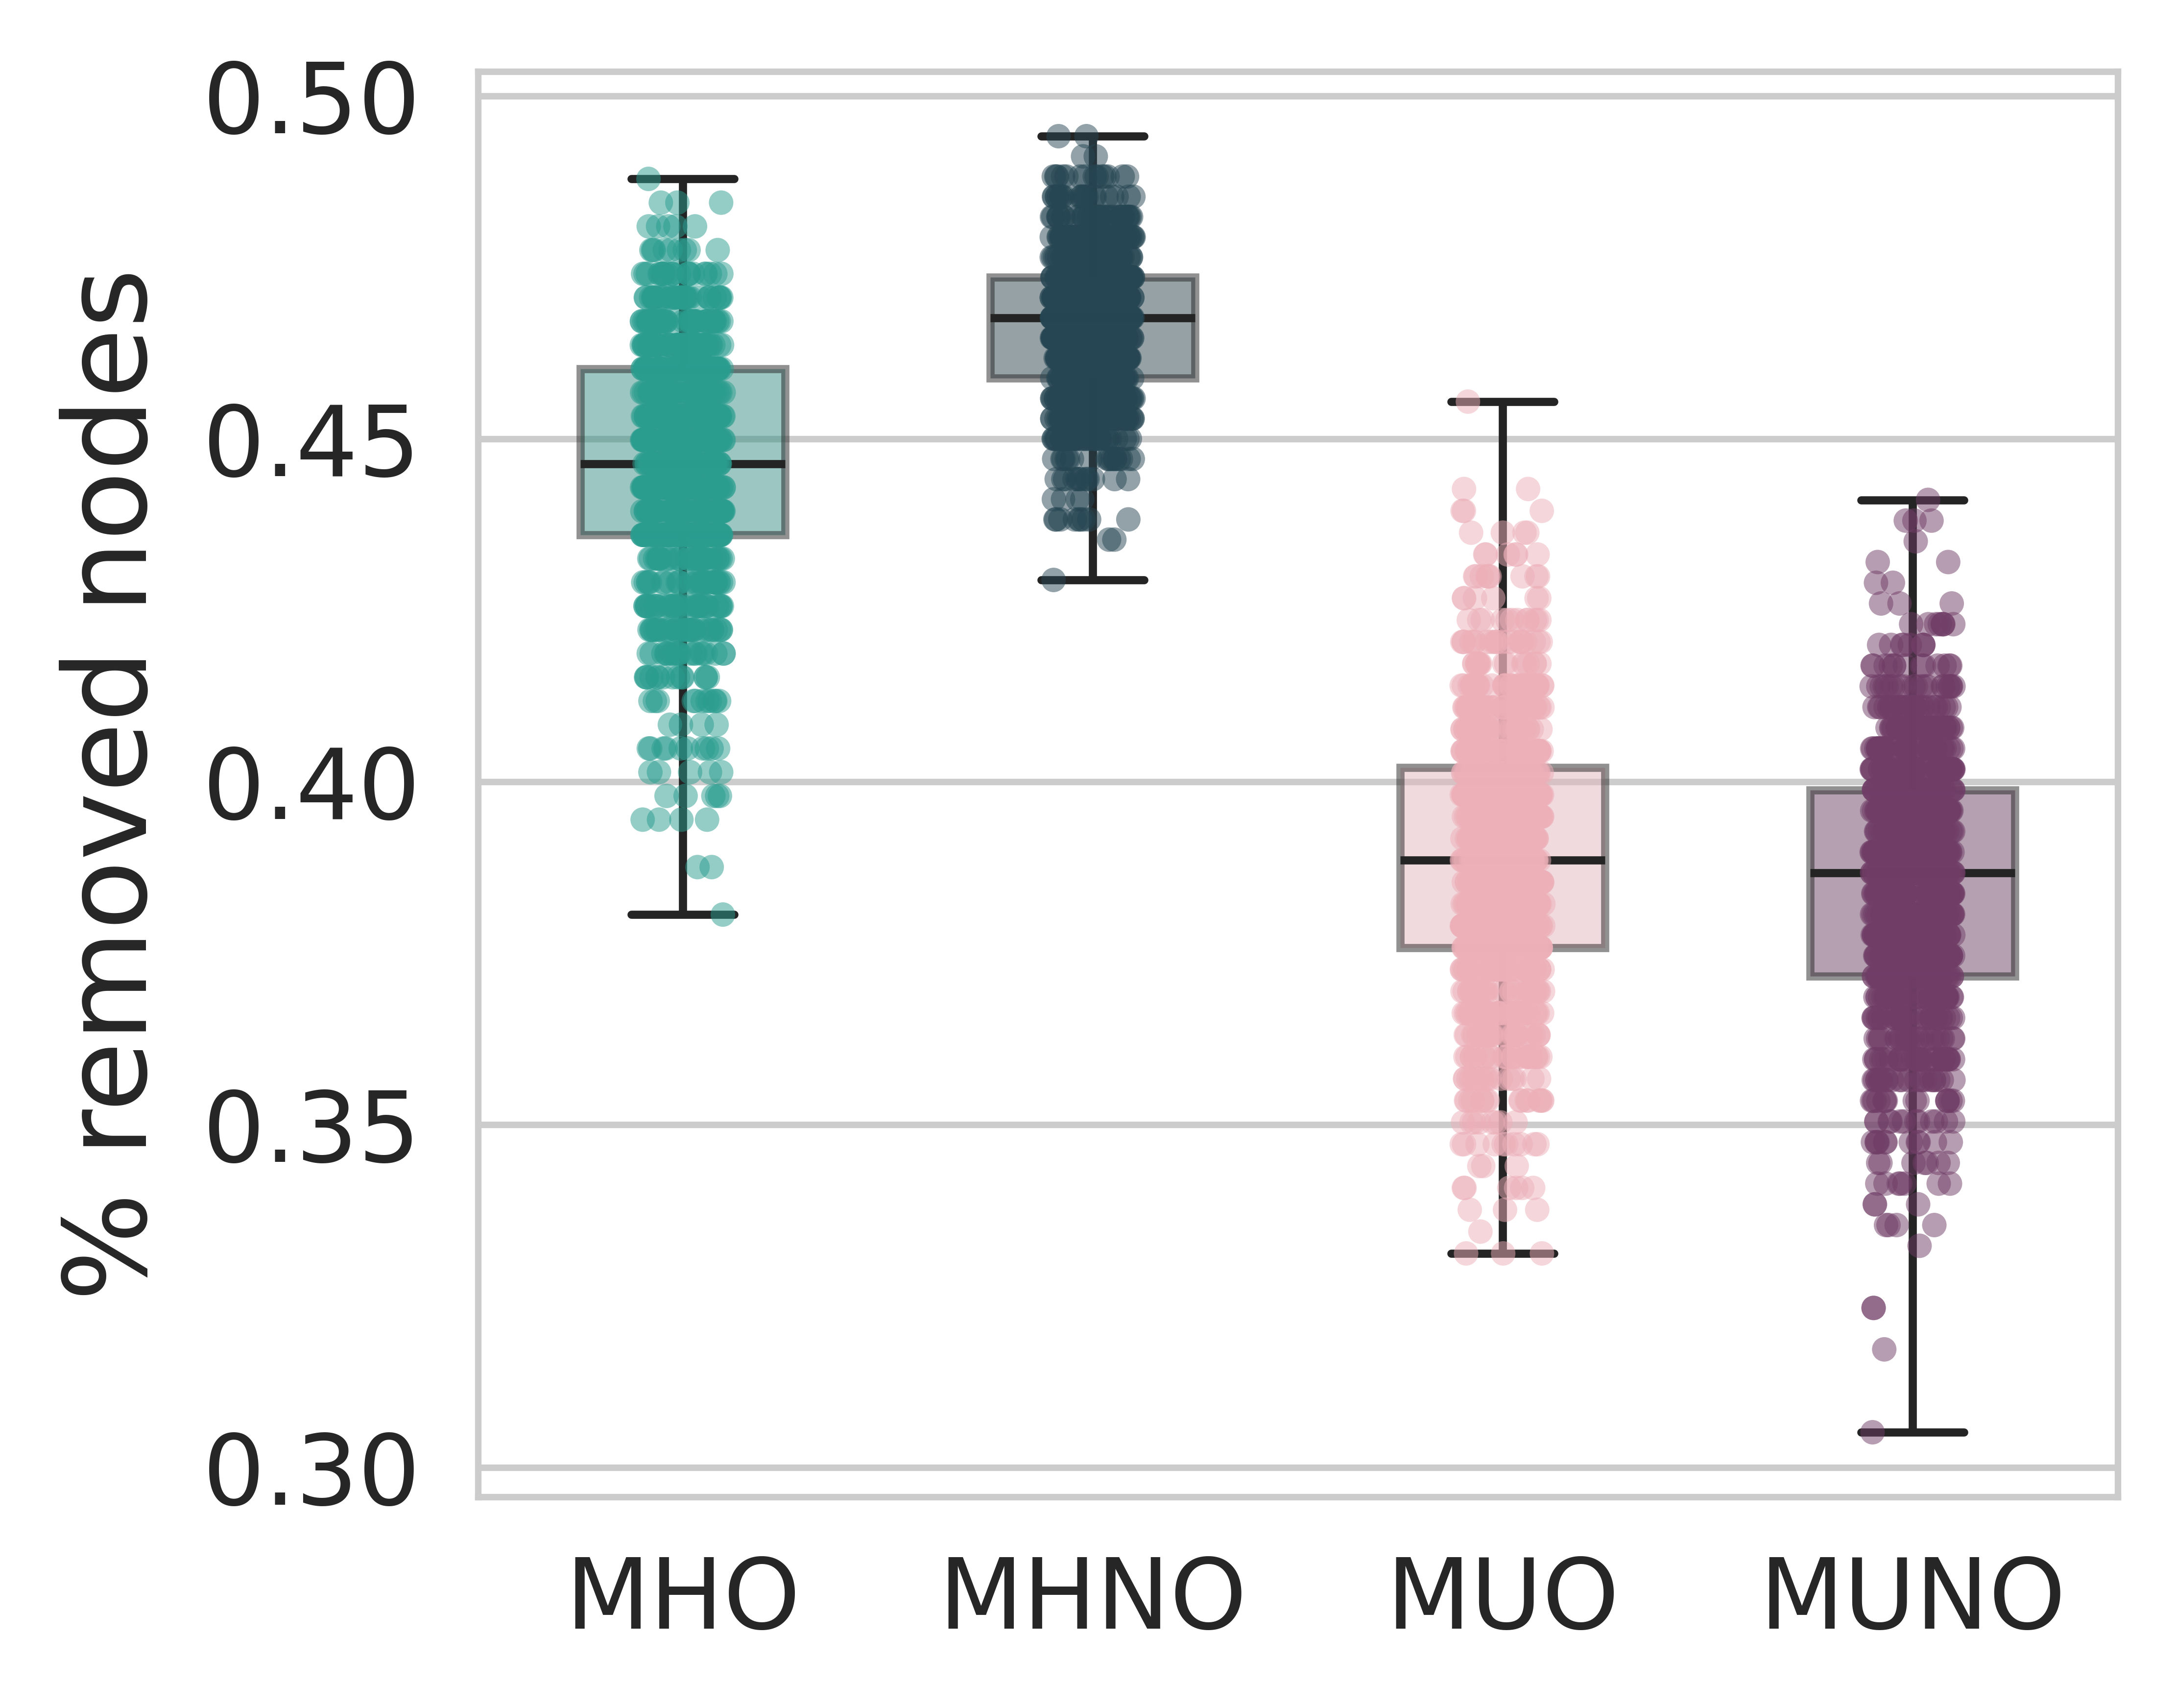

In [38]:

plt.figure(figsize=(3.6, 3.15), dpi=1200)
sns.set_style("whitegrid")
sns.stripplot(
    data=df,
    # jitter=0.25,
    palette=my_pal,
    alpha = .5,
    size = 3,
    jitter = .1
)

sns.boxplot(
    data=df,
    palette=my_pal,
    showfliers=False,        # Elimina los outliers del boxplot
    width=0.5,               # Hace las cajas más estrechas
    boxprops={'alpha': 0.5} , # Añade transparencia
    whis=[0, 100],
)

# Ajustar etiquetas y leyenda
plt.ylabel("% removed nodes", fontsize = 14)
# Ajustar tamaño de los números en los ejes
plt.tick_params(axis='both', which='major', labelsize=12)

# Guardar figura
plt.savefig("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/random_i50.png",
            format='png', dpi=1200,
            bbox_inches='tight')  # Cambia 'mi_grafico.png' al nombre deseado
plt.show();


# Combinar gráficas

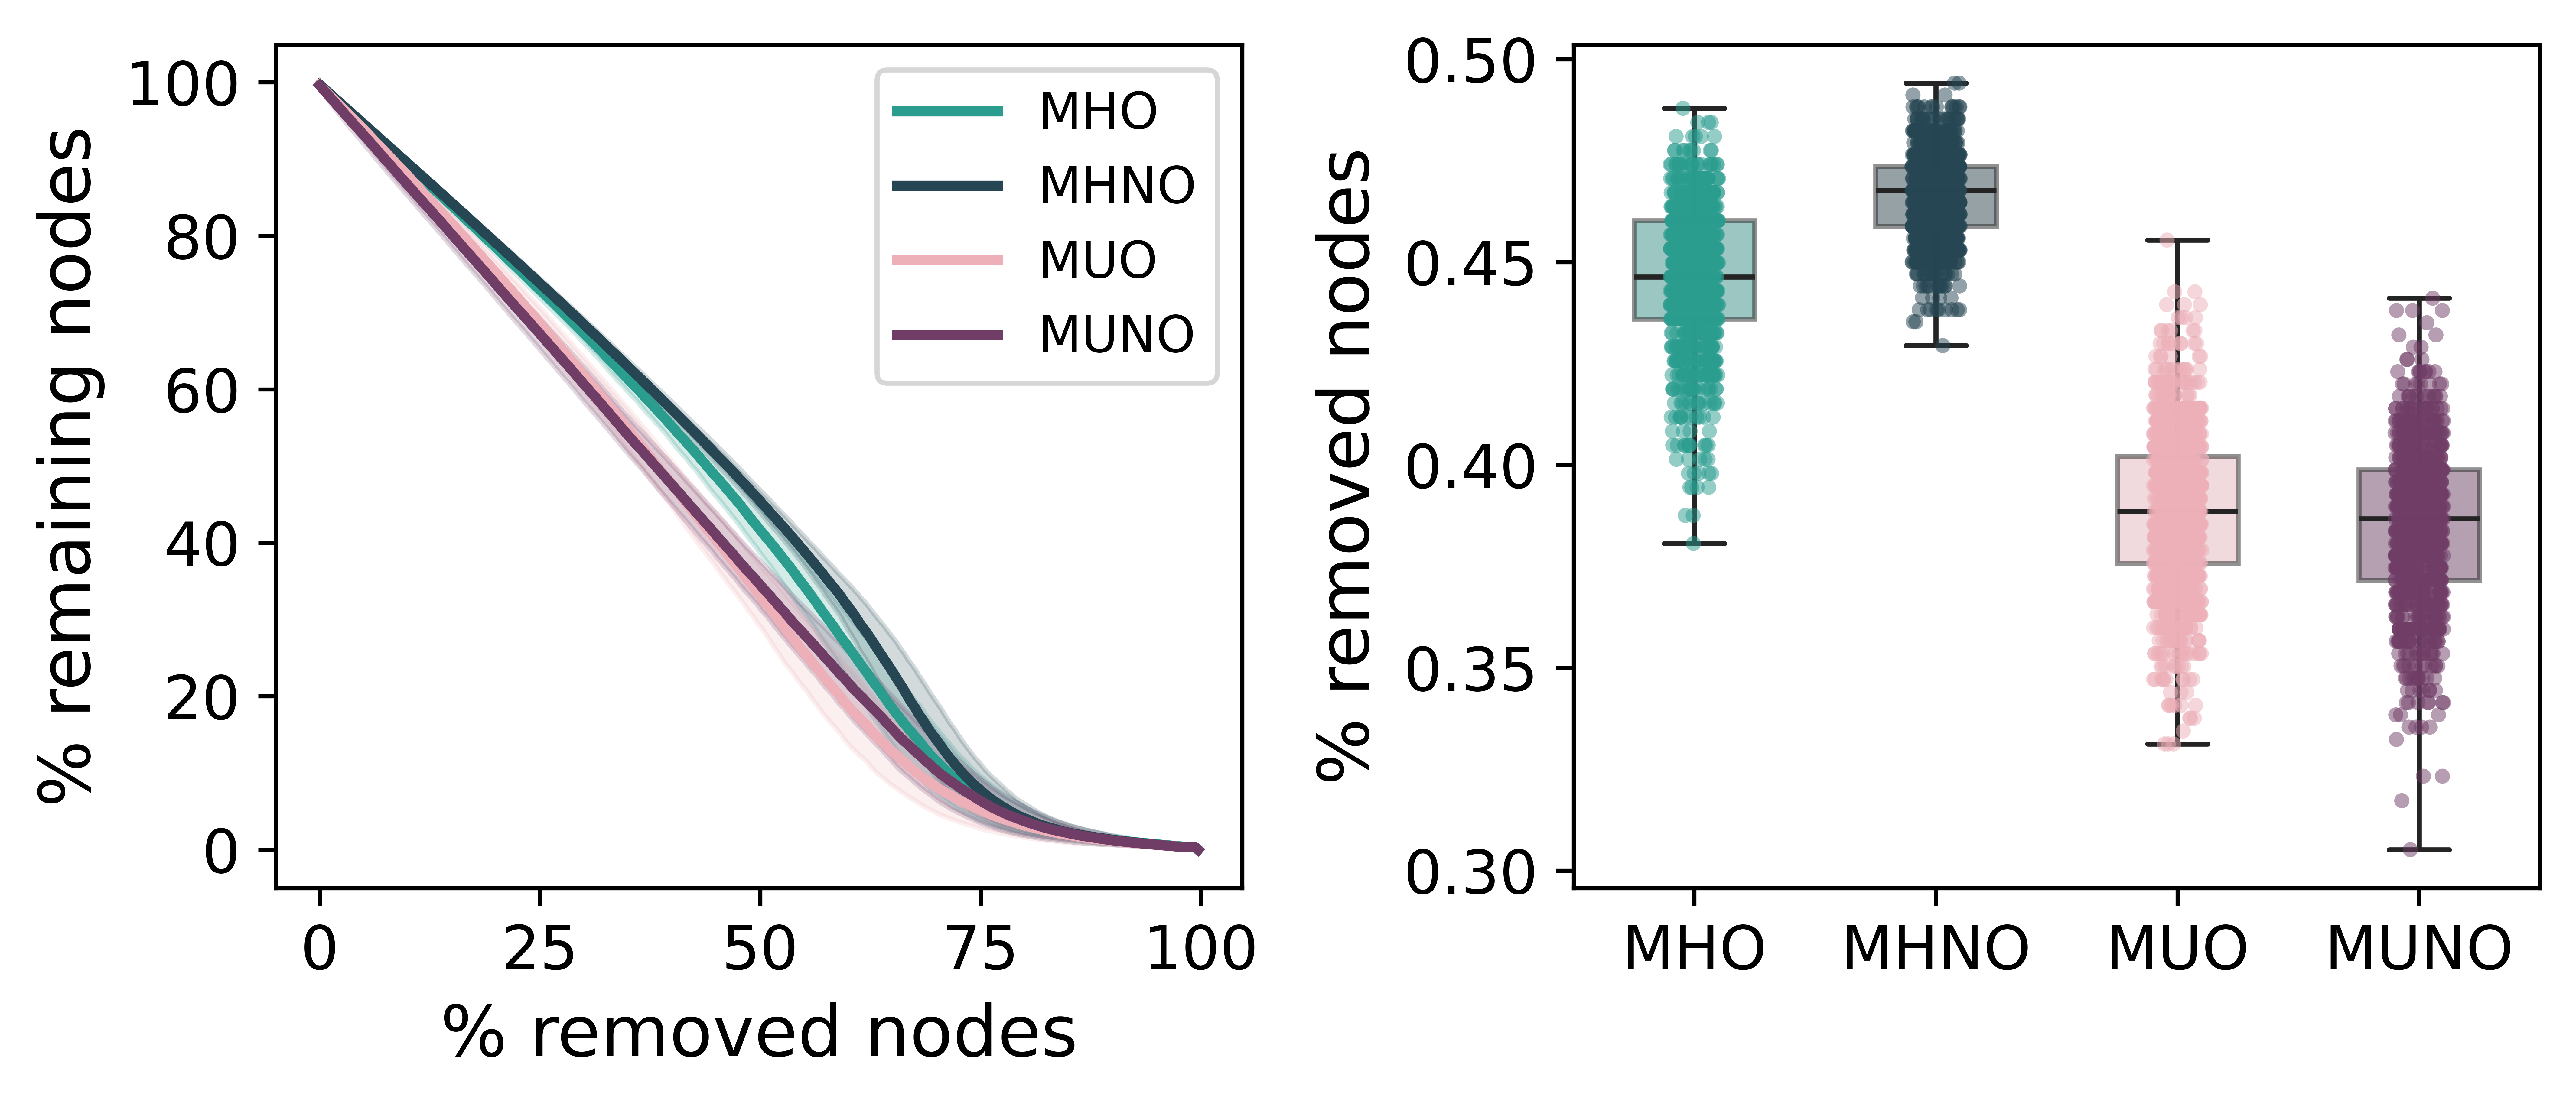

In [39]:
plt.style.use("default")


# Crear una figura con dos subgráficas lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3.15), dpi=1200)  # Tamaño ajustado para Google Docs
# Primera gráfica (líneas con bandas de error)
ax1.plot(x_vals_MHO, MHO_rand_to_plot, linewidth=2, label="MHO", color=mho_col)
ax1.fill_between(x_vals_MHO,
                 MHO_rand_to_plot - MHO_rand_to_plot_sd,
                 MHO_rand_to_plot + MHO_rand_to_plot_sd,
                 edgecolor="none", color=mho_col, alpha=0.2)

ax1.plot(x_vals_MHNO, MHNO_rand_to_plot, linewidth=2, label="MHNO", color=mhno_col)
ax1.fill_between(x_vals_MHNO,
                 MHNO_rand_to_plot - MHNO_rand_to_plot_sd,
                 MHNO_rand_to_plot + MHNO_rand_to_plot_sd,
                 edgecolor="none", color=mhno_col, alpha=0.2)

ax1.plot(x_vals_MUO, MUO_rand_to_plot, linewidth=2, label="MUO", color=muo_col)
ax1.fill_between(x_vals_MUO,
                 MUO_rand_to_plot - MUO_rand_to_plot_sd,
                 MUO_rand_to_plot + MUO_rand_to_plot_sd,
                 edgecolor="none", color=muo_col, alpha=0.2)

ax1.plot(x_vals_MUNO, MUNO_rand_to_plot, linewidth=2, label="MUNO", color=muno_col)
ax1.fill_between(x_vals_MUNO,
                 MUNO_rand_to_plot - MUNO_rand_to_plot_sd,
                 MUNO_rand_to_plot + MUNO_rand_to_plot_sd,
                 edgecolor="none", color=muno_col, alpha=0.2)

# Etiquetas y formato para ax1
ax1.set_xlabel("% removed nodes", fontsize=14)
ax1.set_ylabel("% remaining nodes", fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(loc="best")

# Segunda gráfica (stripplot + boxplot)
sns.set_style("whitegrid")
sns.stripplot(
    data=df,
    palette=my_pal,
    alpha=0.5,
    size=3,
    jitter=0.1,
    ax=ax2  # Dibujar en la segunda subgráfica
)
sns.boxplot(
    data=df,
    palette=my_pal,
    showfliers=False,
    width=0.5,
    boxprops={'alpha': 0.5},
    whis=[0, 100],
    ax=ax2  # Dibujar en la segunda subgráfica
)

# Etiquetas y formato para ax2
ax2.set_ylabel("% removed nodes", fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)

# Ajustar espacio entre las subgráficas
plt.tight_layout()

# Guardar figura
plt.savefig("/content/drive/MyDrive/CRCT/MHOxAI4FOOD/MPA3xTODOSxMHO/random_combined.png",
            format='png', dpi=1200,
            bbox_inches='tight')  # Cambia 'mi_grafico.png' al nombre deseado
plt.show();
